In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pd.options.display.max_rows = 10

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Lee el dataset
dataframe = pd.read_csv("housing.data.csv", delim_whitespace=True, header=None)
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# Transforma los datos en un arreglo de numpy
dataset = dataframe.values
# Divide los datos de entrada y los de salida
X = dataset[:,0:13]
Y = dataset[:,13]

In [5]:
# Define el modelo base
def baseline_model():
    # Crea el modelo
    model = Sequential()
    # Añade una capa 2D
    # Dense(Dimensiones del espacio de salida, dimensión de entrada,
    # inicializador para la matriz de ponderaciones, función de activación relu)
    # Las dimensiones equivalen al número de entradas
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    # Añade una capa 2D con una salidan inicializador normal
    # La dimensión corresponde al número de salidas
    model.add(Dense(1, kernel_initializer='normal'))
    # Configura el modelo para su entrenamiento
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    # Muestra información sobre el modelo
    # model.summary()
    # Muestra el resumen del modelo
    # model.fit(X, Y, batch_size=10, epochs=100)
    return model


In [6]:
# Semillas para la generación de números aleatorios
seed = 7
np.random.seed(seed)
# Evalúa el estimador 
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [7]:
# Se utiliza un método de validación cruzada de 10 divisiones
kfold = KFold(n_splits=10, random_state=seed)
# Evalúa los puntajes de la validación cruzada
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Promedio MSE: %.2f \nDesviación Estandar MSE:(%.2f)" \
      % (results.mean(), results.std()))

Promedio MSE: -32.61 
Desviación Estandar MSE:(23.35)


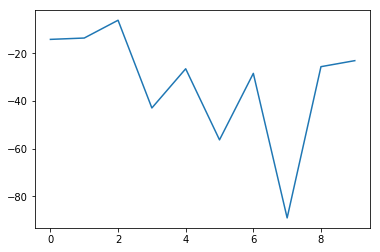

22.532806324110677

In [10]:
plt.plot(results)
plt.show()
Y.mean()
